## Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import PIL

### A1: Download Dataset

In [2]:
# Download the flower dataset
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir) / 'flower_photos'

print('Data directory:', data_dir)

# Count total images in dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Total images in dataset:', image_count)

Data directory: C:\Users\rahul\.keras\datasets\flower_photos\flower_photos
Total images in dataset: 3670


### A2: View Sample Images from Different Classes

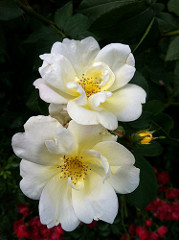

In [3]:
PIL.Image.open(list(data_dir.glob('roses/*'))[0])

### A3: Define Parameters for Data Loading

In [4]:
# Define image and batch parameters
batch_size = 32
img_height = 180
img_width = 180

print(f'Batch size: {batch_size}')
print(f'Image height: {img_height}')
print(f'Image width: {img_width}')

Batch size: 32
Image height: 180
Image width: 180


### A4: Create Training Dataset (80%)

In [5]:
# Create training dataset with 80% of data
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


### A5: Create Validation Dataset (20%)

In [6]:
# Create validation dataset with 20% of data
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names
print('Validation dataset created')
print(f'Classes: {class_names}')
print(f'Number of classes: {len(class_names)}')

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Validation dataset created
Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Number of classes: 5


### A7: Optimize Datasets for Performance

In [7]:
# # Optimize datasets using cache, shuffle, and prefetch
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### B1: Create Data Augmentation

In [8]:
# Create data augmentation layer to prevent overfitting
data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


### B3: Build CNN Model Architecture

In [9]:
# Build the CNN model
model = Sequential([
    # Data augmentation layer
    data_augmentation,
    
    # Rescaling layer - normalize pixel values
    layers.Rescaling(1./255),
    
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten layer
    layers.Flatten(),
    
    # Dense layer
    layers.Dense(128, activation='relu'),
    
    # Output layer - 5 classes (flower types)
    layers.Dense(len(class_names), activation='softmax')
])

print('Model architecture created')

Model architecture created


### B5: Compile the Model

In [10]:
# Compile the model with optimizer and loss function
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### C1: Train Model for 10 Epochs

In [ ]:
# Train the model for 10 epochs
print('Training model for 10 epochs...\n')
epochs_1 = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_1,
    verbose=1
)

print('\nFirst training phase completed')

Training model for 10 epochs...

Epoch 1/10
 7/92 ━━━━━━━━━━━━━━━━━━━━ 41s 483ms/step - accuracy: 0.2654 - loss: 2.8210

In [ ]:
# Display model architecture summary
model.summary()

### D1: Plot Training Accuracy and Loss (First 10 Epochs)

In [ ]:
# Plot accuracy and loss from first training phase
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy', linewidth=2)
plt.plot(val_acc, label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', linewidth=2)
plt.plot(val_loss, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### D3: Evaluate Model Performance

In [ ]:
# Evaluate model on training dataset
train_loss, train_acc = model.evaluate(train_ds, verbose=0)

# Evaluate model on validation dataset
val_loss, val_acc = model.evaluate(val_ds, verbose=0)

print(f'Training Accuracy:   {train_acc*100:.2f}%')
print(f'Training Loss:       {train_loss:.4f}')
print(f'Validation Accuracy: {val_acc*100:.2f}%')

### D4: Make Prediction on Random Single Image

In [ ]:
# Get a random image from validation dataset
for images, labels in val_ds.take(1):
    # Select a random image from the batch
    random_index = np.random.randint(0, len(images))
    random_image = images[random_index]
    random_label = labels[random_index]
    
    # Make prediction
    prediction = model.predict(tf.expand_dims(random_image, 0), verbose=0)
    predicted_class = class_names[np.argmax(prediction[0])]
    actual_class = class_names[random_label]
    confidence = 100 * np.max(prediction[0])
    
    # Display the image with prediction
    plt.figure(figsize=(8, 8))
    plt.imshow(random_image.numpy().astype('uint8'))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f'Predicted Class: {predicted_class}')
    print(f'Actual Class: {actual_class}')